In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sms
from scipy.stats import pearsonr
import pingouin as pg
from functools import reduce

# Tannin data

In [2]:
tan14 = pd.read_csv("../data/nir_SC_2014.txt", sep='\t', lineterminator='\n')
tan14 = tan14[["taxa", "Tannin"]]
tan14_mean = tan14.groupby("taxa").mean()
print(tan14_mean)
tan14_mean_zeroFilter = tan14_mean.loc[tan14_mean.Tannin < 0, "Tannin"] = 0
print(tan14_mean_zeroFilter)

            Tannin
taxa              
PI152651   9.17200
PI17548   35.49000
PI24969   -2.78700
PI329435  -0.48000
PI329440  -8.63350
...            ...
PI659691  -0.31350
PI659694   0.28400
PI659695  -4.79250
PI659696  31.03350
PI659753  -9.17675

[368 rows x 1 columns]
0


In [3]:
tan13 = pd.read_csv("../data/nir_SC_2013.txt", sep='\t', lineterminator='\n')
tan13 = tan13[["taxa", "Tannins"]]
tan13_mean = tan13.groupby("taxa").mean()
print(tan13_mean)

          Tannins
taxa             
PI152651   3.4160
PI17548   21.8940
PI24969    0.0000
PI329440   0.0000
PI34911   13.2790
...           ...
PI659691   0.0000
PI659694   0.0000
PI659695   0.0000
PI659696  29.5875
PI659753   0.0000

[333 rows x 1 columns]


/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [159]:
dfs = [tan14_mean, tan13_mean]
all_tan = reduce(lambda left, right: pd.merge(left, right, on = "taxa"), dfs)
all_tan = all_tan.rename(columns = {'taxa':'PI',
                                    'Tannin':'Tan_14', 'Tannins':'Tan_13'})
print(all_tan.shape)
all_tan.head()

(327, 2)


,Tan_14,Tan_13
taxa,,
PI152651,9.172,3.416
PI17548,35.490,21.894
PI24969,0.000,0.000
PI329440,0.000,0.000
PI34911,5.160,13.279


# Clostridium 

In [113]:
clostridium_df = pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Clostridium")
clostridium_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,cp_inhibitionZone,cp_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,0,p0101-M1,412.005,>420.000,412.0050,0,0.0,PI533876,Caudatum,Nigeria,KA 12 Janjari,R,1.0,0
1,1,p0101-M2,320.088,325.318,322.7030,0,0.0,PI656116,NaN,Mali,SC 1506,R,1.0,0
2,2,p0102-M1,>420.000,>420.000,420.0000,0,0.0,PI576350,Kafir-Caudatum,USA,SAP-417,R,1.0,4
3,3,p0102-M2,>420.000,>420.000,420.0000,0,0.0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
4,4,p0103-M2,413.011,414.75,413.8805,0,0.0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND


In [156]:
clostridium_df = clostridium_df[["cp_AMA", "PI","Testa","TP_avg"]]
clostridium_df.head()

,cp_AMA,PI,Testa,TP_avg
0,0.0,PI533876,1.0,412.0050
1,0.0,PI656116,1.0,322.7030
2,0.0,PI576350,1.0,420.0000
3,0.0,PI641849,1.0,420.0000
4,0.0,PI533877,0.0,413.8805


In [115]:
ama_mean = clostridium_df.groupby("PI").mean()
ama_mean.reset_index(inplace=True)
ama_mean.head()

,PI,cp_AMA,Testa,TP_avg
0,PI152651,0.000,1.0,294.73100
1,PI17548,0.000,0.0,420.00000
2,PI24969,1.775,0.0,292.25900
3,PI329435,1.775,0.0,210.67500
4,PI329440,4.400,0.0,275.53875


In [160]:
tan_and_ama = all_tan.merge(ama_mean, left_on = "taxa", right_on ="PI")
tan_and_ama.head()

,Tan_14,Tan_13,PI,cp_AMA,Testa,TP_avg
0,9.172,3.416,PI152651,0.000,1.0,294.73100
1,35.490,21.894,PI17548,0.000,0.0,420.00000
2,0.000,0.000,PI24969,1.775,0.0,292.25900
3,0.000,0.000,PI329440,4.400,0.0,275.53875
4,5.160,13.279,PI34911,1.775,1.0,317.42900


# T-Test

In [161]:
x = tan_and_ama.Tan_14
y = tan_and_ama.Tan_13
pg.ttest(x, y, correction='auto')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.330267,630,two-sided,0.183912,"[-0.59, 3.09]",0.10583,0.21,0.264288


# Testa

In [162]:
mean_tan_13_14 = tan14_mean.merge(tan13_mean, on = "taxa")
print(mean_tan_13_14)

           Tannin  Tannins
taxa                      
PI152651   9.1720   3.4160
PI17548   35.4900  21.8940
PI24969    0.0000   0.0000
PI329440   0.0000   0.0000
PI34911    5.1600  13.2790
...           ...      ...
PI659691   0.0000   0.0000
PI659694   0.2840   0.0000
PI659695   0.0000   0.0000
PI659696  31.0335  29.5875
PI659753   0.0000   0.0000

[327 rows x 2 columns]


In [163]:
min_tan= mean_tan_13_14.groupby("taxa").mean()
print(min_tan)

           Tannin  Tannins
taxa                      
PI152651   9.1720   3.4160
PI17548   35.4900  21.8940
PI24969    0.0000   0.0000
PI329440   0.0000   0.0000
PI34911    5.1600  13.2790
...           ...      ...
PI659691   0.0000   0.0000
PI659694   0.2840   0.0000
PI659695   0.0000   0.0000
PI659696  31.0335  29.5875
PI659753   0.0000   0.0000

[327 rows x 2 columns]


In [164]:
col =mean_tan_13_14.loc[: , "Tannin":"Tannins"]
mean_tan_13_14['tannin_mean']=col.mean(axis=1)
mean_tan_13_14

,Tannin,Tannins,tannin_mean
taxa,,,
PI152651,9.1720,3.4160,6.2940
PI17548,35.4900,21.8940,28.6920
PI24969,0.0000,0.0000,0.0000
PI329440,0.0000,0.0000,0.0000
PI34911,5.1600,13.2790,9.2195
...,...,...,...
PI659691,0.0000,0.0000,0.0000
PI659694,0.2840,0.0000,0.1420
PI659695,0.0000,0.0000,0.0000


In [165]:
mean_tan_and_ama = mean_tan_13_14.merge(ama_mean, left_on = "taxa", right_on ="PI")
mean_tan_and_ama

,Tannin,Tannins,tannin_mean,PI,cp_AMA,Testa,TP_avg
0,9.1720,3.4160,6.2940,PI152651,0.000,1.0,294.73100
1,35.4900,21.8940,28.6920,PI17548,0.000,0.0,420.00000
2,0.0000,0.0000,0.0000,PI24969,1.775,0.0,292.25900
3,0.0000,0.0000,0.0000,PI329440,4.400,0.0,275.53875
4,5.1600,13.2790,9.2195,PI34911,1.775,1.0,317.42900
...,...,...,...,...,...,...,...
311,0.0000,0.0000,0.0000,PI659691,0.000,0.0,187.63575
312,0.2840,0.0000,0.1420,PI659694,0.000,0.0,204.11050
313,0.0000,0.0000,0.0000,PI659695,0.000,0.0,262.61350
314,31.0335,29.5875,30.3105,PI659696,0.000,1.0,420.00000


# Figure 3

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


([<matplotlib.axis.XTick at 0x7f1fb255d160>,
 <a list of 2 Text xticklabel objects>)

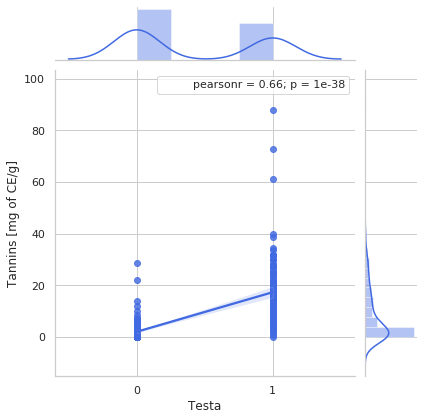

In [166]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
tan_testa_joint = sns.jointplot(x="Testa", y="tannin_mean", data=mean_tan_and_ama, kind="reg", stat_func=R2, color="royalblue").annotate(stats.pearsonr)
tan_testa_joint.set_axis_labels( "Testa","Tannins [mg of CE/g]")
plt.xticks([0,1])

Figure S3

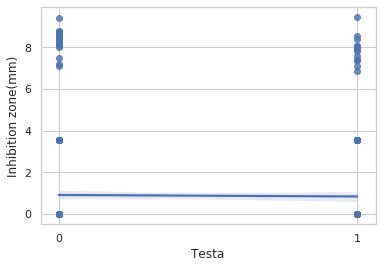

In [167]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

testa_ama_scat=sns.regplot(x="Testa", y="cp_AMA", data=clostridium_df)
testa_ama_scat.set(ylabel="Inhibition zone(mm)")
plt.xticks([0,1])
testa_ama_scat.figure.savefig("testa_ama_scat.png", bbox_inches='tight', dpi=600)

# Figure2a

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


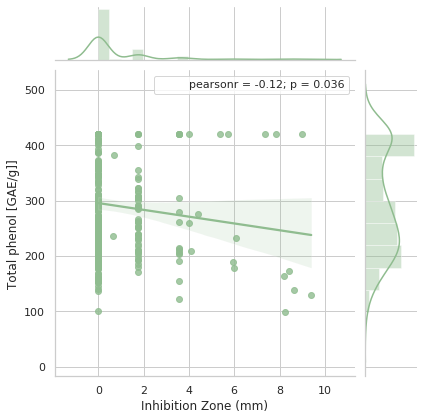

In [168]:
tp_ama_joint = sns.jointplot(x="cp_AMA", y="TP_avg", data=mean_tan_and_ama, kind="reg", stat_func=R2, color="darkseagreen").annotate(stats.pearsonr)
tp_ama_joint.set_axis_labels( "Inhibition Zone (mm)","Total phenol [GAE/g]]")
tp_ama_joint.savefig("tp_ama_joint.png", bbox_inches='tight', dpi=600)

# Figure2b

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


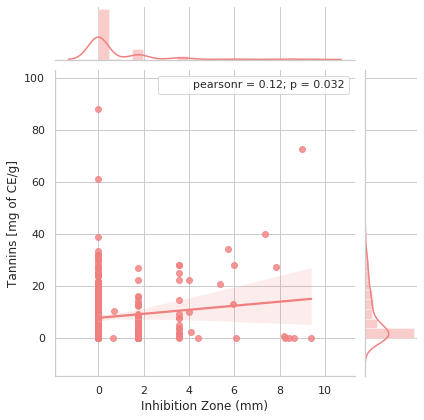

In [169]:
tan_ama_joint = sns.jointplot(x="cp_AMA", y="tannin_mean", data=mean_tan_and_ama, kind="reg", stat_func=R2, color="lightcoral").annotate(stats.pearsonr)
tan_ama_joint.set_axis_labels( "Inhibition Zone (mm)","Tannins [mg of CE/g]")
tan_ama_joint.savefig("tan_ama_joint.png", bbox_inches='tight', dpi=600)

# Salmonella 

In [170]:
salmonella_df=pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Salmonella")
salmonella_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,0,p0101-M2,320.088,325.318,322.7030,0,0,PI656116,NaN,Mali,SC 1506,R,1.0,0
1,1,p0102-M2,>420.000,>420.000,420.0000,0,0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
2,2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND
3,3,p0104-M1,319.039,336.31,327.6745,0,0,PI534088,Caudatum,Nigeria,ZA 6,NaN,0.0,0
4,4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1.0,ND


In [171]:
salmonella_df.dropna(inplace=True)
salmonella_df["Testa"] = salmonella_df.Testa.astype(int)
salmonella_df.Tannins.replace("ND", 0, inplace=True)
salmonella_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
2,2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0,0.0
4,4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1,0.0
5,5,p0105-M2,331.87,320.792,326.3310,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
6,6,p0106-M1,206.301,194.202,200.2515,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
7,7,p0107-M1,399.504,399.375,399.4395,0,0,PI534047,Caudatum,Sudan,450 Bori Light Brown,R,1,0.0


# Table S2

In [172]:
pd.crosstab(np.array(salmonella_df.Testa), 
            [np.array(salmonella_df.se_AMA)])

col_0,0,1
row_0,,
0,172,10
1,73,123


In [173]:
se_mean = salmonella_df.groupby("PI").mean()
se_mean.reset_index(inplace=True)
se_mean.head()

,PI,Unnamed: 0,TP_avg,se_AMA,Testa,Tannins
0,PI533750,185.0,284.79575,0.0,0.0,0.0
1,PI533752,722.0,420.00000,1.0,1.0,9.1
2,PI533754,341.5,270.18750,0.5,1.0,0.0
3,PI533755,18.5,157.20600,0.0,1.0,4.5
4,PI533757,486.0,297.92450,0.5,1.0,8.8


In [174]:
tan_and_se = all_tan.merge(se_mean, left_on = "taxa", right_on ="PI")
tan_and_se.head()

,Tan_14,Tan_13,PI,Unnamed: 0,TP_avg,se_AMA,Testa,Tannins
0,12.831,19.1605,PI533752,722.0,420.00000,1.0,1.0,9.1
1,15.638,2.9840,PI533754,341.5,270.18750,0.5,1.0,0.0
2,13.676,8.1505,PI533755,18.5,157.20600,0.0,1.0,4.5
3,1.634,6.1530,PI533757,486.0,297.92450,0.5,1.0,8.8
4,11.441,24.7430,PI533758,336.5,331.65875,0.0,1.0,25.3


In [175]:
mean_tan_and_seama = mean_tan_13_14.merge(se_mean, left_on = "taxa", right_on ="PI")
mean_tan_and_seama

,Tannin,Tannins_x,tannin_mean,PI,Unnamed: 0,TP_avg,se_AMA,Testa,Tannins_y
0,12.8310,19.1605,15.99575,PI533752,722.0,420.00000,1.0,1.0,9.1
1,15.6380,2.9840,9.31100,PI533754,341.5,270.18750,0.5,1.0,0.0
2,13.6760,8.1505,10.91325,PI533755,18.5,157.20600,0.0,1.0,4.5
3,1.6340,6.1530,3.89350,PI533757,486.0,297.92450,0.5,1.0,8.8
4,11.4410,24.7430,18.09200,PI533758,336.5,331.65875,0.0,1.0,25.3
...,...,...,...,...,...,...,...,...,...
164,1.1930,0.0000,0.59650,PI656114,199.5,222.82300,0.0,0.0,0.0
165,0.0000,0.0000,0.00000,PI656115,333.5,409.92000,0.0,0.0,0.0
166,1.5520,0.0000,0.77600,PI656119,51.5,166.94425,0.0,0.0,0.0
167,27.4455,26.3465,26.89600,PI656121,635.0,420.00000,1.0,1.0,22.8


# Figure S2

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


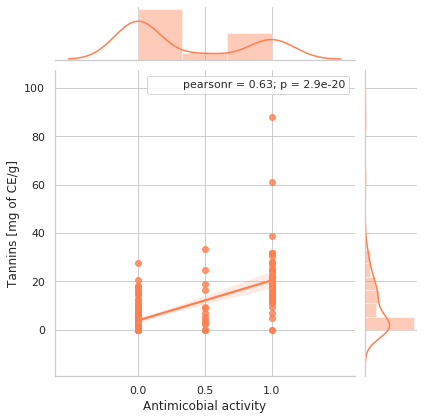

In [176]:
se_joint = sns.jointplot(x="se_AMA", y="tannin_mean", data=mean_tan_and_seama, kind="reg", stat_func=R2, color="coral").annotate(stats.pearsonr)
se_joint.set_axis_labels( "Antimicobial activity","Tannins [mg of CE/g]")
plt.xticks([0,0.5,1])
se_joint.savefig("se_joint.png", bbox_inches='tight', dpi=600)

# Figure S1

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


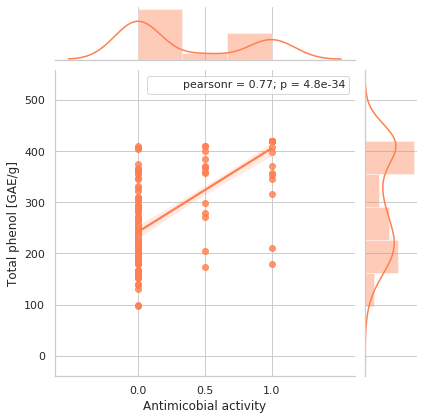

In [177]:
se_TP_joint = sns.jointplot(x="se_AMA", y="TP_avg", data=mean_tan_and_seama, kind="reg", stat_func=R2, color="coral").annotate(stats.pearsonr)
se_TP_joint.set_axis_labels( "Antimicobial activity","Total phenol [GAE/g]")
plt.xticks([0,0.5,1])
se_TP_joint.savefig("se_TP_joint.png", bbox_inches='tight', dpi=600)

# Germplasm filtering

In [178]:
ama = list(clostridium_df["cp_AMA"])
new_ama = []
for i in ama:
    if i < 1:
        new_ama.append("none")
    if ((i >3.5) and (i<4)):
        new_ama.append("weak")
    if (i>=4):
        new_ama.append("strong")
clostridium_df["AMA"] = new_ama
set(new_ama)

{'none', 'strong', 'weak'}

In [179]:
rep_agreement = clostridium_df.groupby("PI").min()
rep_agreement = rep_agreement[rep_agreement["cp_AMA"] != 0]
print(rep_agreement)

          cp_AMA  Testa    TP_avg     AMA
PI                                       
PI533762    3.55    1.0  197.4255    weak
PI533869    8.10    0.0   94.5230  strong
PI533871    8.10    0.0  131.9915  strong
PI533940    3.55    0.0  112.1870  strong
PI533948    8.55    0.0  127.6940  strong
PI533979    3.55    0.0  162.3790  strong
PI534114    3.55    1.0  420.0000  strong
PI534115    8.00    0.0  141.4370  strong
PI534138    3.55    NaN  420.0000    weak
PI542406    7.10    1.0  420.0000  strong
PI566819    3.55    1.0  420.0000    weak
PI576376    3.55    0.0  208.0065    weak
PI576393    3.55    1.0    6.9065  strong
PI595739    9.40    0.0  130.1680  strong
PI595740    3.55    1.0  420.0000    weak
PI597945    3.55    0.0  213.2360    weak
PI597957    3.55    0.0  226.6685  strong
PI597972    3.55    NaN  159.3810  strong
PI598069    3.55    1.0  420.0000    weak
PI641836    3.55    1.0  420.0000  strong
PI642998    7.40    1.0  420.0000  strong
PI655980    7.40    1.0  420.0000 

# Table 3

In [180]:
pd.crosstab(np.array(clostridium_df.Testa), 
            [np.array(clostridium_df.AMA)])

col_0,none,strong,weak
row_0,,,
0.0,299,19,51
1.0,227,15,32


In [181]:
strong = rep_agreement[rep_agreement.AMA.str.contains("strong", case=False)]
print(strong)

          cp_AMA  Testa    TP_avg     AMA
PI                                       
PI533869    8.10    0.0   94.5230  strong
PI533871    8.10    0.0  131.9915  strong
PI533940    3.55    0.0  112.1870  strong
PI533948    8.55    0.0  127.6940  strong
PI533979    3.55    0.0  162.3790  strong
PI534114    3.55    1.0  420.0000  strong
PI534115    8.00    0.0  141.4370  strong
PI542406    7.10    1.0  420.0000  strong
PI576393    3.55    1.0    6.9065  strong
PI595739    9.40    0.0  130.1680  strong
PI597957    3.55    0.0  226.6685  strong
PI597972    3.55    NaN  159.3810  strong
PI641836    3.55    1.0  420.0000  strong
PI642998    7.40    1.0  420.0000  strong
PI655980    7.40    1.0  420.0000  strong
PI655983    7.60    1.0  420.0000  strong
PI655995    8.53    1.0  420.0000  strong
PI656014    6.88    1.0  420.0000  strong
PI656088    8.30    0.0  176.0480  strong
PI656112    3.55    0.0  189.1655  strong


In [182]:
pis = ["PI533869","PI533871","PI533940","PI533948","PI533979",
       "PI534114","PI534115","PI542406","PI576393","PI595739",
       "PI597957","PI597972","PI641836","PI642998","PI655980",
       "PI655983","PI655995","PI656014","PI656088","PI656112"]

In [183]:
pi_values = clostridium_df[clostridium_df.PI.isin(pis)].sort_values(by="PI")
print(pi_values.PI.unique())

['PI533869' 'PI533871' 'PI533940' 'PI533948' 'PI533979' 'PI534114'
 'PI534115' 'PI542406' 'PI576393' 'PI595739' 'PI597957' 'PI597972'
 'PI641836' 'PI642998' 'PI655980' 'PI655983' 'PI655995' 'PI656014'
 'PI656088' 'PI656112']


# Compositional data

In [184]:
nir_raw = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
columns = ["_".join(i.split()) for i in list(nir_raw.columns)]
nir_raw.columns = columns
nir_raw.head()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep,Sample_ID,cp_AMA,sal_AMA
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,4.51,9.50,-0.17,0,69.89,19.95,1.0,FL17-SAP-M1-p0101,0.0,1.0
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.80,...,6.14,12.84,-0.13,0,61.98,23.58,1.0,FL17-SAP-M1-p0102,0.0,1.0
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.50,89.68,61.26,10.80,7.92,-1.98,...,5.12,10.42,-0.13,0,72.12,15.92,1.0,NaN,0.0,NaN
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.70,10.40,1.19,...,6.08,13.63,-0.19,0,66.76,22.00,1.0,NaN,0.0,NaN
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,5.97,12.31,-0.23,0,67.67,20.49,1.0,FL17-SAP-M1-p0107,0.0,1.0


In [185]:
numeric_columns = nir_raw.columns[3:len(nir_raw.columns)-4]

In [186]:
fl17_ama = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
print(fl17_ama.shape)
fl17_ama.head()

(776, 44)


,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep,Sample ID,cp_AMA,sal_AMA
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,4.51,9.50,-0.17,0,69.89,19.95,1.0,FL17-SAP-M1-p0101,0.0,1.0
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.80,...,6.14,12.84,-0.13,0,61.98,23.58,1.0,FL17-SAP-M1-p0102,0.0,1.0
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.50,89.68,61.26,10.80,7.92,-1.98,...,5.12,10.42,-0.13,0,72.12,15.92,1.0,NaN,0.0,NaN
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.70,10.40,1.19,...,6.08,13.63,-0.19,0,66.76,22.00,1.0,NaN,0.0,NaN
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,5.97,12.31,-0.23,0,67.67,20.49,1.0,FL17-SAP-M1-p0107,0.0,1.0


/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


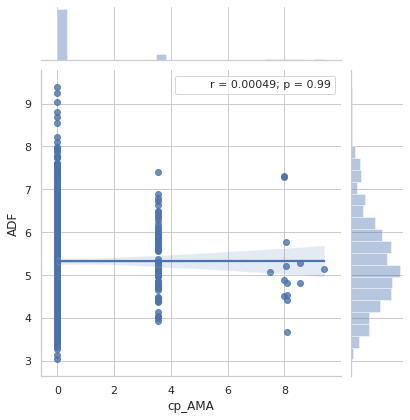

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


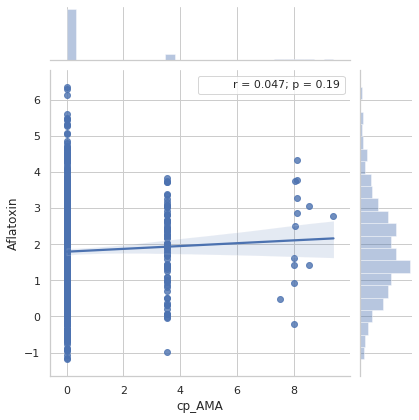

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


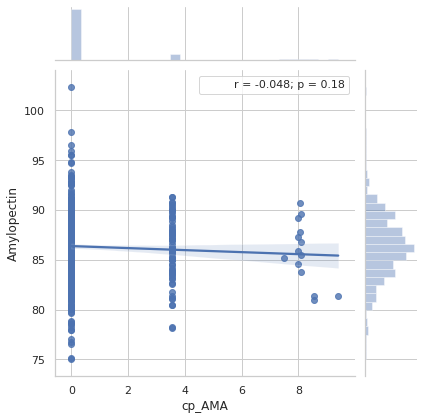

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


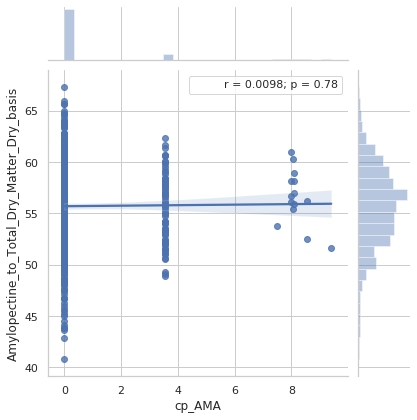

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


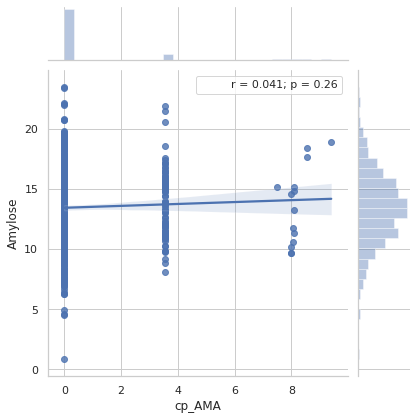

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


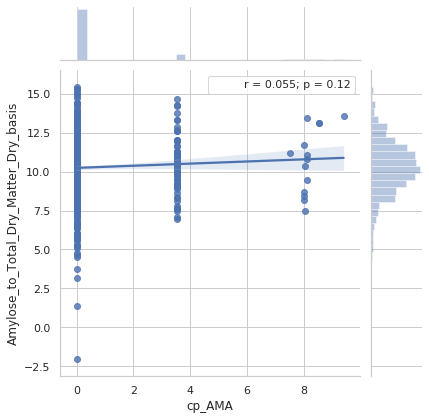

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


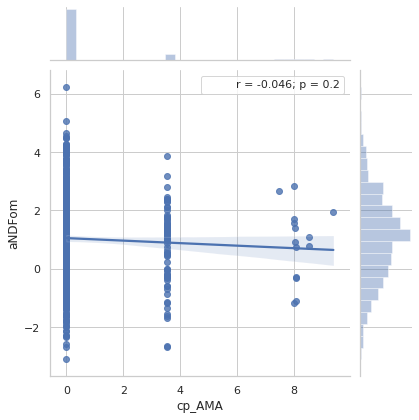

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


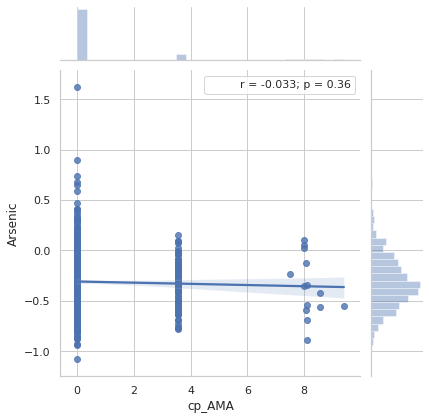

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


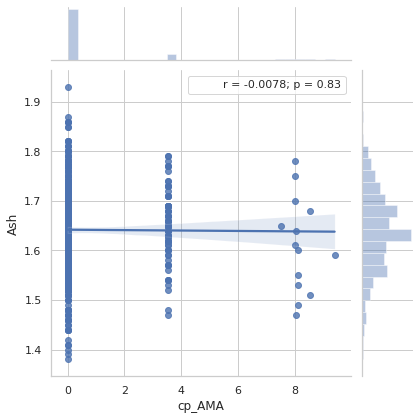

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


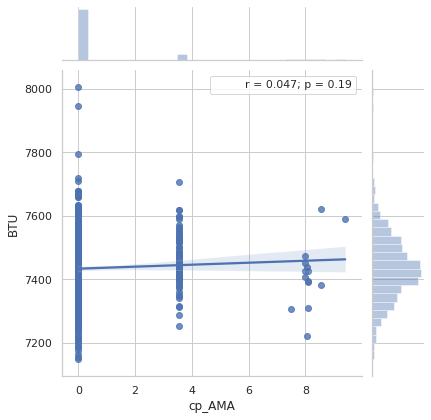

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


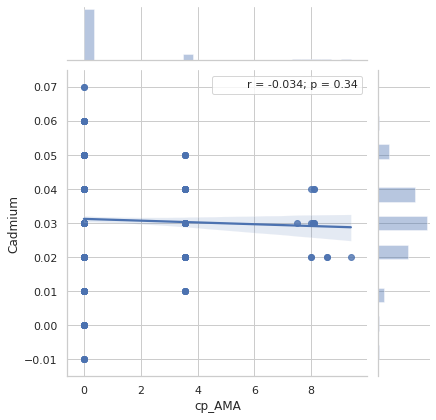

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


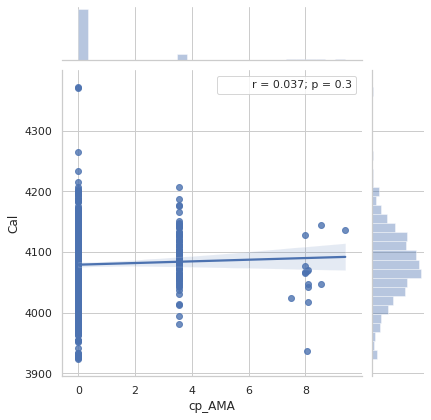

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


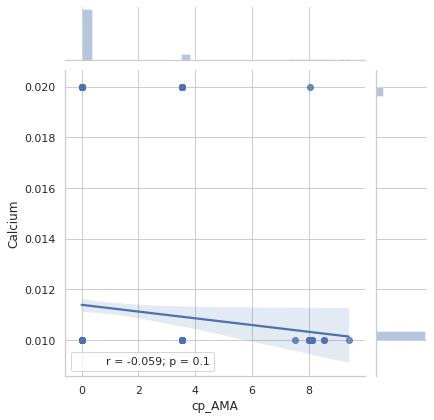

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


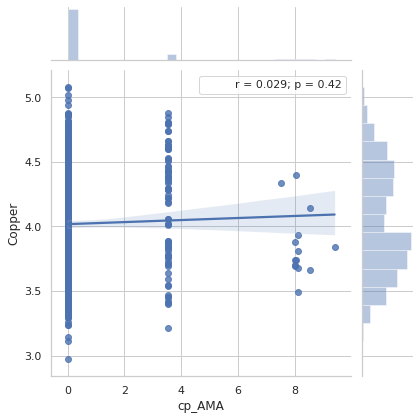

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


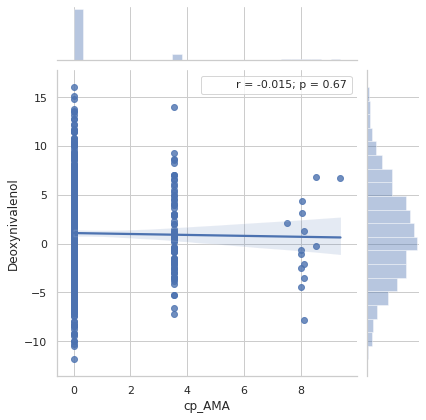

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


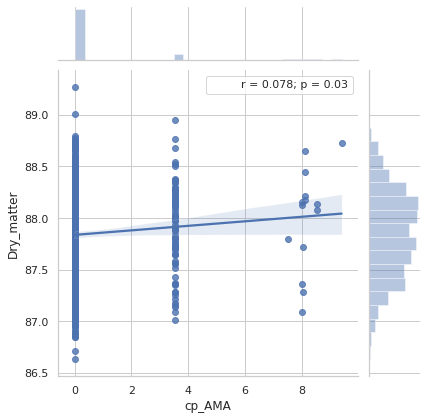

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


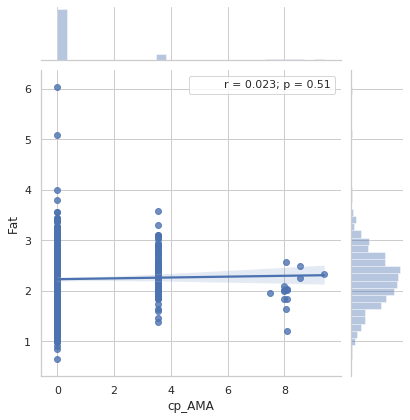

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


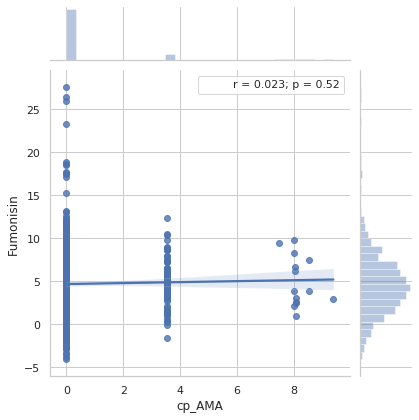

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


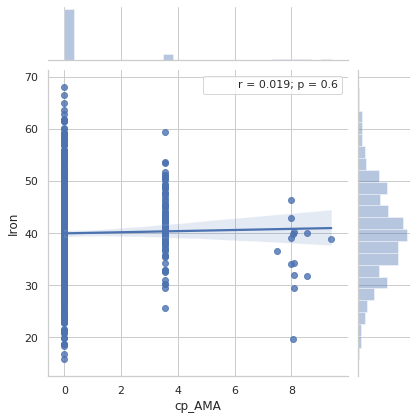

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


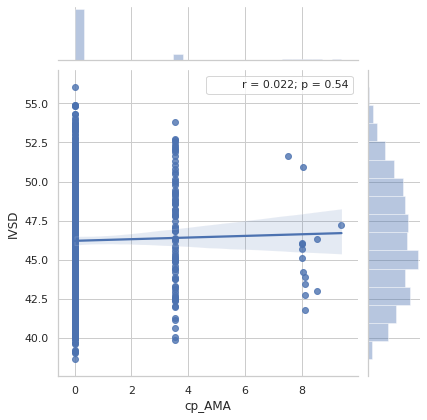

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


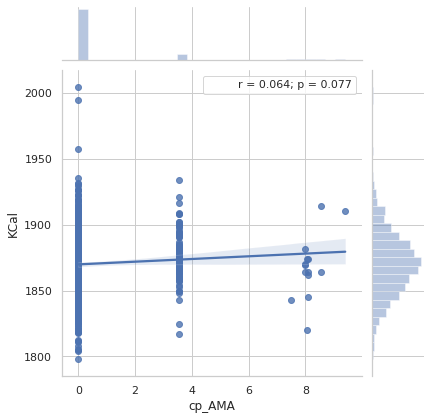

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


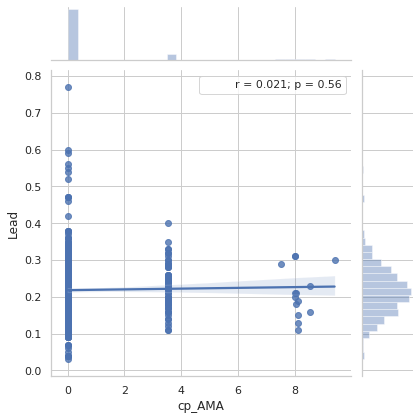

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


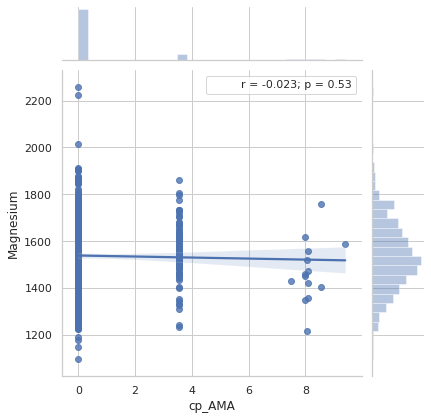

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


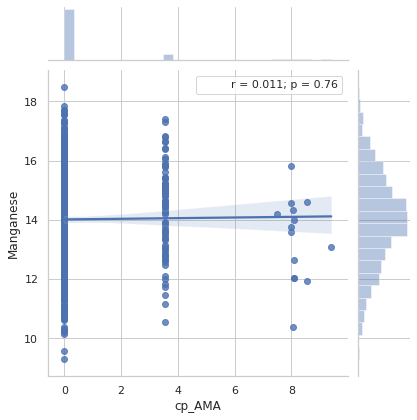

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


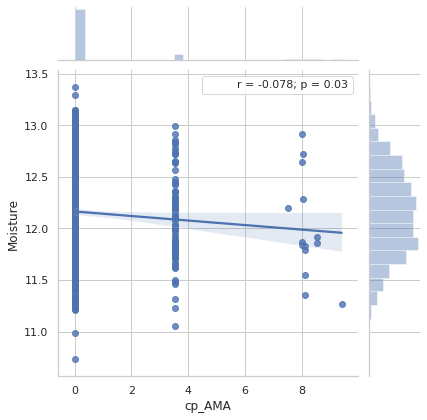

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


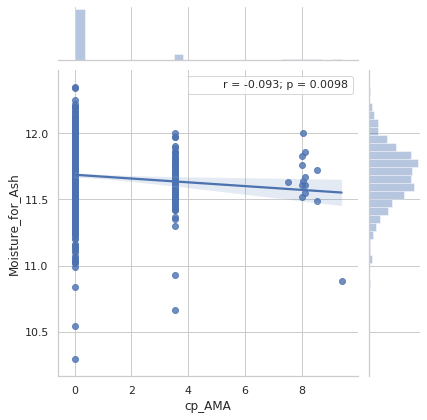

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


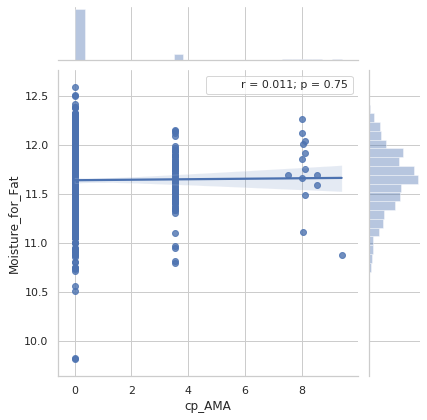

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


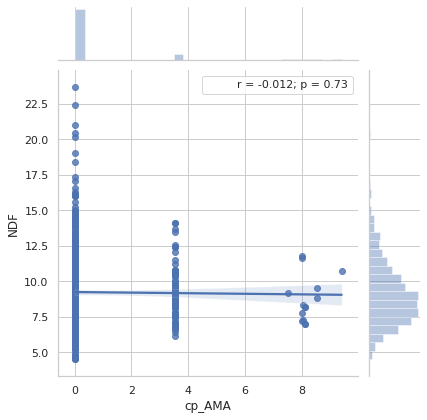

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


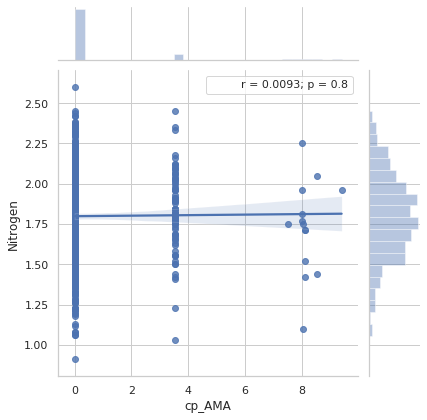

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


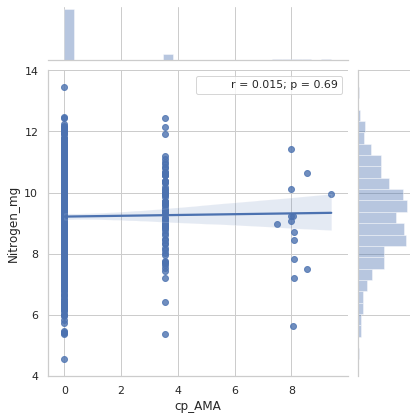

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


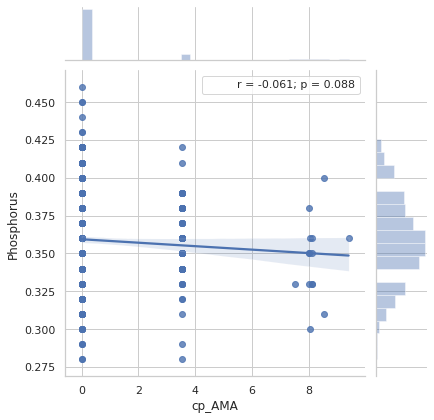

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


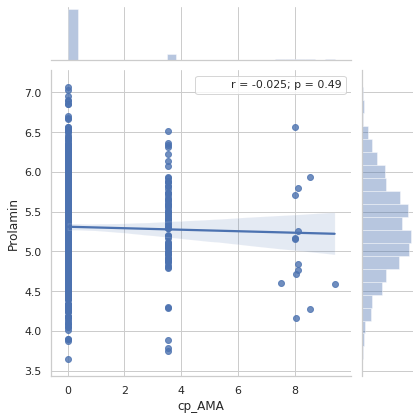

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


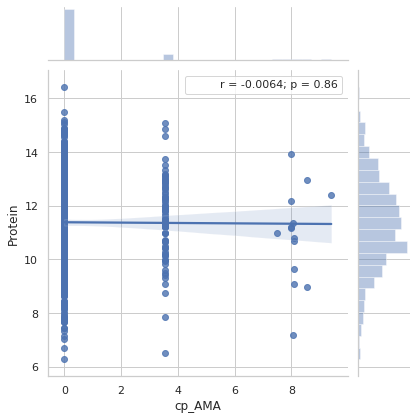

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


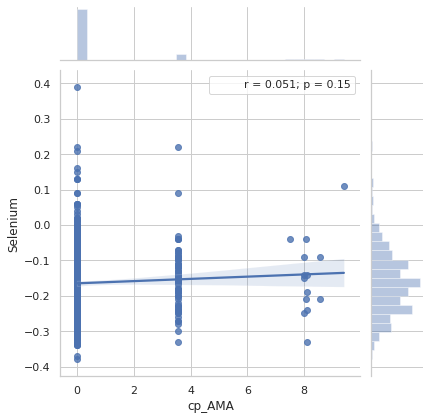

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


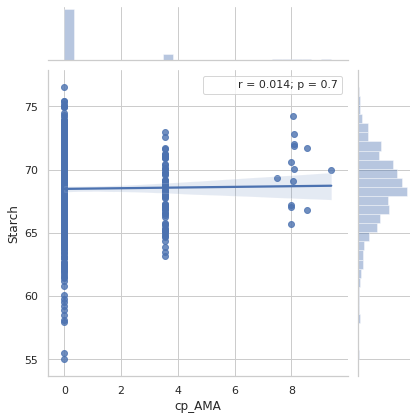

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


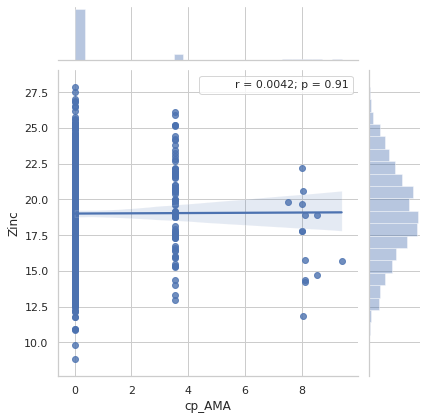

In [187]:
 def r(x, y):
     return stats.pearsonr(x, y)

 p_values = []

 for i in list(numeric_columns.values):
     if i not in ["Sodium"]:
         sns.jointplot(x="cp_AMA", 
                       y=i, 
                       data=fl17_ama, 
                       kind="reg", 
                       marginal_kws=dict(kde=False), 
                       stat_func=r)
         p_values.append(r(fl17_ama.cp_AMA, fl17_ama.loc[:,i]))
         plt.show()

In [188]:
corr_pval = pd.DataFrame(p_values, columns=["r","pvalue"])
corr_pval = corr_pval.drop(34) # trait 34 was removed because all NIR measurments = 0
corr_pval.head()

,r,pvalue
0,0.000491,0.989115
1,0.046760,0.193191
2,-0.048050,0.181180
3,0.009845,0.784226
4,0.040592,0.258732


In [189]:
sms.stats.multipletests(corr_pval["pvalue"], alpha=0.05, method="fdr_bh")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([0.98911538, 0.57393686, 0.57393686, 0.89810966, 0.69658671,
        0.57393686, 0.57393686, 0.77923234, 0.90683086, 0.57393686,
        0.77923234, 0.75185533, 0.57393686, 0.85232856, 0.89810966,
        0.35086115, 0.85232856, 0.85232856, 0.87174183, 0.85232856,
        0.57393686, 0.85232856, 0.85232856, 0.89810966, 0.35086115,
        0.34382566, 0.89810966, 0.89810966, 0.89810966, 0.89810966,
        0.57393686, 0.85232856, 0.90977954, 0.57393686, 0.93298071]),
 0.0014644493428053185,
 0.0014285714285714286)

# Race and Origin

In [190]:
origin_df = pd.read_excel("../data/Supplemental_F4.xlsx", sheet_name= "Total_origin")
origin_df.head()

,Origin,count (sample),AMA_geno,SAP_geno,AMA/SAP (Genotpye %)
0,Brazil,2,1,1,100.000000
1,Chad,2,1,4,25.000000
2,China,7,4,4,133.333333
3,Congo,2,1,1,100.000000
4,Egypt,1,1,2,50.000000


# Figure S4

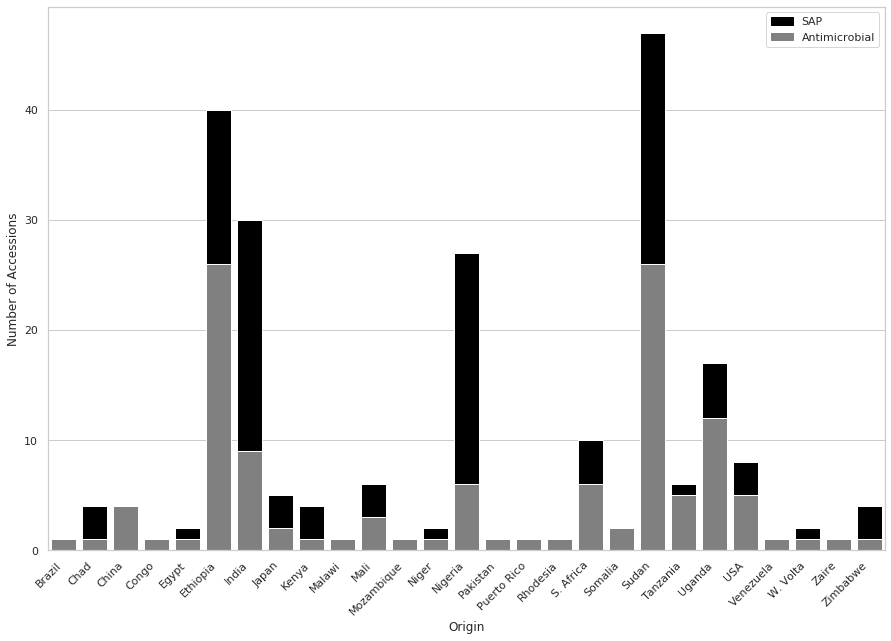

In [191]:
import matplotlib.patches as mpatches
sns.set(style="whitegrid")
g = plt.figure(figsize=(15,10))

g = sns.barplot(x="Origin", y="SAP_geno",
                     data= origin_df, color="black")

plt.xticks(rotation=45, ha='right')

sns.barplot(x="Origin", y="AMA_geno", ax=g,
                         data=origin_df, color="grey")
sap_patches = mpatches.Patch(color="black", label="SAP")
ama_patches = mpatches.Patch(color="grey", label="Antimicrobial")
plt.ylabel("Number of Accessions")
plt.legend(handles=[sap_patches, ama_patches])
plt.show()


# Figure S5

In [192]:
race_df = pd.read_excel("Race_Origin_USEME.xlsx", sheet_name= "Total_race")
race_df.head()

,Race,count (sample),AMA_geno,SAP_geno,AMA/SAP (genotype %)
0,Bicolor,27,15,17,88.235294
1,Caudatum,75,40,77,51.948052
2,Caudatum-Bicolor,7,4,7,57.142857
3,Durra,8,8,23,34.782609
4,Durra-Bicolor,28,16,23,69.565217


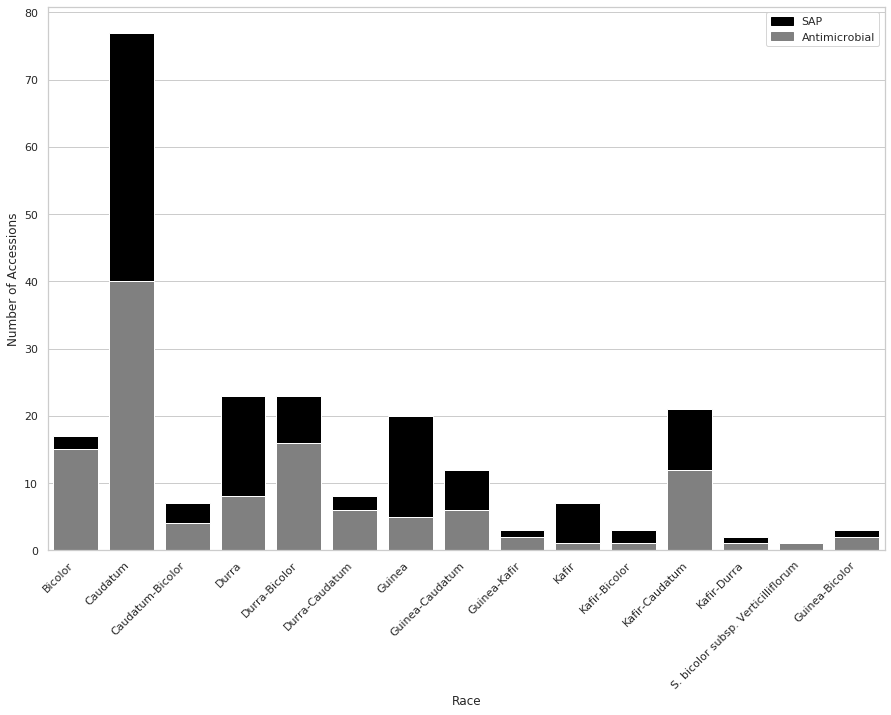

In [193]:
sns.set(style="whitegrid")
m = plt.figure(figsize=(15,10))

race_sap = sns.barplot(x="Race", y="SAP_geno",
                     data= race_df, color="black")

plt.xticks(rotation=45, ha='right')


race_ama = sns.barplot(x="Race", y="AMA_geno", 
                         data=race_df, color="grey")

sap_patches = mpatches.Patch(color="black", label="SAP")
ama_patches = mpatches.Patch(color="grey", label="Antimicrobial")
plt.ylabel("Number of Accessions")
plt.legend(handles=[sap_patches, ama_patches])
plt.show()
